# Bouton density

- Calculate bouton density
- Validate bouton density

<img src="bouton_density.png">

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from bluepy.v2 import Cell, Circuit
from connectome_tools.dataset import read_bouton_density

In [15]:
circuit = Circuit('/gpfs/bbp.cscs.ch/project/proj42/circuits/O1/20180907/CircuitConfig')
mtypes = sorted(circuit.cells.mtypes)

In [16]:
SAMPLE_SIZE = 10

In [17]:
bouton_densities = {}
for mtype in mtypes:
    group = {Cell.MTYPE: mtype, Cell.REGION: '@mc2.*'}
    sample = circuit.stats.sample_bouton_density(SAMPLE_SIZE, group, synapses_per_bouton=1.2)
    bouton_densities[mtype] = {
        'mean': np.mean(sample),
        'std': np.std(sample)
    }
bouton_densities = pd.DataFrame(bouton_densities).transpose()
bouton_densities.head()

,mean,std
SO_BP,0.155502,0.000000
SO_BS,0.000000,0.000000
SO_OLM,0.166904,0.044985
SO_Tri,0.073939,0.071992
SP_AA,0.044236,0.012661


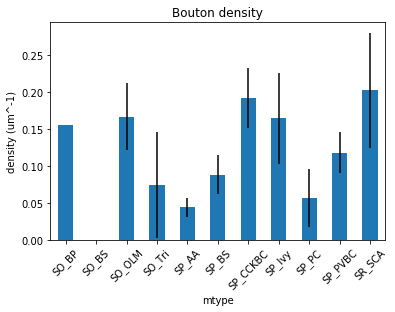

In [18]:
ax = bouton_densities.plot.bar(yerr='std', title='Bouton density', legend=False)
ax.set_xlabel('mtype')
ax.set_ylabel('density (um^-1)')
ax.set_xticklabels(labels=bouton_densities.index, rotation=45);

In [19]:
bio_path = '/gpfs/bbp.cscs.ch/project/proj42/circuits/O1/20180907/bioname/bouton_density_20180125.tsv'

In [20]:
data = read_bouton_density(bio_path).rename(columns={
    'mean': 'bio_mean',
    'std': 'bio_std'
})
data.drop(0, inplace=True) 
data.drop(['size', 'sample'], axis=1, inplace=True) 
data.head()

,mtype,bio_mean,bio_std
1,SO_BS,0.2100,0.0
2,SO_BP,0.2480,0.0
3,SP_PC,0.1356,0.0
4,SO_Tri,0.2820,0.0
5,SP_PVBC,0.2260,0.0


In [21]:
selected = data['mtype'].values
data['mod_mean'] = bouton_densities['mean'][selected].values
data['mod_std'] = bouton_densities['std'][selected].values
data.dropna(inplace=True)
data.head()

,mtype,bio_mean,bio_std,mod_mean,mod_std
1,SO_BS,0.2100,0.0,0.000000,0.000000
2,SO_BP,0.2480,0.0,0.155502,0.000000
3,SP_PC,0.1356,0.0,0.056398,0.039529
4,SO_Tri,0.2820,0.0,0.073939,0.071992
5,SP_PVBC,0.2260,0.0,0.118180,0.028246


Text(0.5,1,'Bouton density')

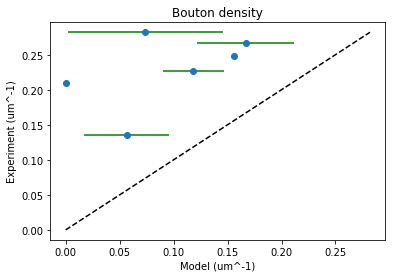

In [22]:
x = data['mod_mean'].values
y = data['bio_mean'].values
# remove nan value from the array
l = np.linspace(0, max(x[~np.isnan(x)].max(), y.max()), 50)
#plt.plot(x, y, 'o')
plt.errorbar(x, y, xerr=data['mod_std'].values, yerr=data['bio_std'].values, fmt='o', ecolor='g', capthick=2)
plt.plot(l, l, 'k--')
plt.xlabel('Model (um^-1)')
plt.ylabel('Experiment (um^-1)')
plt.title('Bouton density')